# A better model for LHb neurons
## still based upon the Hindmarsh-Rose bursting model 

**Reference:**<br> Hindmarsh, J. L., & Rose, R. M.<br> A model of neuronal bursting using three coupled first
  order differential equations. Proceedings of the Royal society of London, Series B. Biological sciences **221**(1222): 87-102, 1984.


$\newcommand{\rmd}{\textrm{d}}$
$\newcommand{\eqdef}{:=}$
$\newcommand{\eps}{\varepsilon}$

We consider an extended version of the Hindmarsh-Rose bursting model, where we add a slow process on two parameters, one mimicking an applied current and the other one related to channel dynamics.
Parameter values are chosen so that the system is poised in the vicinity of a codimension-2 *saddle-node homoclinic (SNH)* bifurcation. Then, we propose phenomenological slow equations for these two parameters, which make them move slowly within that two-parameter bifurcation diagram, with feedback terms in $x$ that mimic voltage-gated ion channels. Depending on the region these slow dynamics span, i.e. below or above the SNH point, allows to obtain the two bursting patterns (*square-wave* and *parabolic*) obversed in the data.

The differential equations read:

\begin{aligned}
x^{\prime} & =c(x-x^3/3-y+z+I)\\
y^{\prime} & =(x^2+dx-by+a)/c\\
z^{\prime} & =\eps(-s_1(x-x_1)-(b-b_0))\\
b^{\prime} & =\eps(z-z_0+\alpha x)\\
\end{aligned}

the last two equations corresponding to a slow dynamics on $(z,b)$. 

&copy; [Fabien Campillo](https://www-sop.inria.fr/members/Fabien.Campillo/index.html) for the python and SDE simulation mastery.

In [1]:
%matplotlib widget

#import random
#from scipy.integrate import odeint
#import seaborn as sns
#from matplotlib.colors import SymLogNorm

#plt.rcParams['font.family'] = "roman"
#plt.rcParams['text.usetex'] = True
#plt.rc('text.latex', preamble=r'\usepackage{amsmath,mhchem}')

#cl = sns.color_palette('tab10', 21)
from math import *
#from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

### Parameter values and initial conditions

In [11]:
# ___ system parameters __________________________________________________________________________

a, c, d, I = 0.08, 3, 1.8, 2.0   # parameter controlling the (x,y)-equation
x1         = -3.0                # one parameter of the z-component of the slow forcing
eps        = 0.01                # speed of the slow forcing

# ___ random generator seed ______________________________________________________________________

np.random.seed(123)

# ___ initial condition __________________________________________________________________________

# --- deterministic simulations (SW, 13 spikes)
xic1, yic1, zic1, bic1 = -3.71, 14.27, -1.12, 0.33
ini_cond1 = np.array([xic1,yic1,zic1,bic1])
# --- deterministic simulations (PARB, 2 spikes)
xic2, yic2, zic2, bic2 = -1.81, 0.07, -1.97, 1.369
ini_cond2 = np.array([xic2,yic2,zic2,bic2])

# --- load bifurcation diagram (computed with AUTO)
bifdiag = np.loadtxt('diagram.dat')

# --- SDE simulations (SW, 13 spikes)
std_deviation_ini_cond1 = 0.05
ini_cond1_x   = xic1 + np.random.normal(0., std_deviation_ini_cond1)
ini_cond1_y   = yic1 + np.random.normal(0., std_deviation_ini_cond1)
ini_cond1_z   = zic1 + np.random.normal(0., std_deviation_ini_cond1)
ini_cond1_b   = bic1 + np.random.normal(0., std_deviation_ini_cond1)
# --- SDE simulations (PARB, 12 spikes)
std_deviation_ini_cond2 = 0.05
ini_cond2_x   = xic2 + np.random.normal(0., std_deviation_ini_cond2)
ini_cond2_y   = yic2 + np.random.normal(0., std_deviation_ini_cond2)
ini_cond2_z   = zic2 + np.random.normal(0., std_deviation_ini_cond2)
ini_cond2_b   = bic2 + np.random.normal(0., std_deviation_ini_cond2)

### Right-hand side of the system

In [12]:
# ___ ODEs _______________________________________________________________________________________
def HRext(t, S, s1, alpha, z0, b0):
    x =S[0]
    y =S[1]
    z =S[2]
    b =S[3]
    dxdt=c*(x-x**3/3-y+z+I)
    dydt=(x**2+d*x-b*y+a)/c
    dzdt=eps*(-s1*(x-x1)-(b-b0))
    dbdt=eps*(z-z0+alpha*x)
    return np.array([dxdt,dydt,dzdt,dbdt])

### Simulation of square-wave (SW) bursting: 13 spikes (match the data)

In [5]:
s1, alpha, z0, b0 = 0.1, -0.1, -0.7533, 0.57
# Simulate the extended HR model in the SW regime
t_span = (0, 2000)  # Time span for simulation
t_eval = np.linspace(t_span[0],t_span[1],100000)  # Time points to evaluate
solSW = solve_ivp(HRext,t_span,ini_cond1,args=(s1, alpha, z0, b0,),t_eval=t_eval,rtol=1e-10)

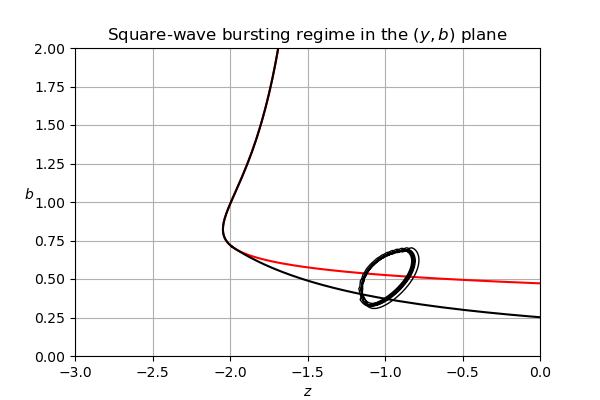

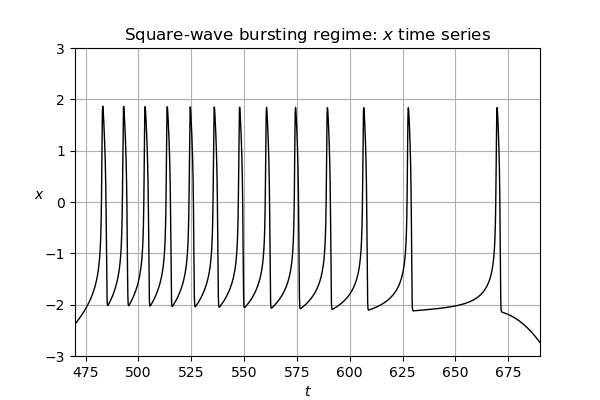

In [6]:
#------
# PLOT
#------
## Figure 1 left panel 
plt.figure(figsize=(6, 4))
# plot bifurcation diagram
plt.plot(bifdiag[  0: 399 ,0],bifdiag[  0: 399   ,1],color='red')
plt.plot(bifdiag[400: 799 ,0],bifdiag[400: 799   ,1],color='red')
plt.plot(bifdiag[800: 904 ,0],bifdiag[800: 904   ,1],color='black')
plt.plot(bifdiag[905:1304 ,0],bifdiag[905:1304   ,1],color='black')
# Plot the solution 
plt.plot(solSW.y[2],solSW.y[3],'k',linewidth=1)
# Add labels 
plt.xlabel('$z$')
plt.ylabel('$b$',rotation=0)
plt.title('Square-wave bursting regime in the $(y,b)$ plane')
plt.xlim([-3, 0])
plt.ylim([ 0, 2])
plt.grid()
plt.show()
## Figure 2 left panel 
# Plot the solution in projection onto the (z,b) plane 
plt.figure(figsize=(6, 4))
plt.plot(solSW.t,solSW.y[0],'k',linewidth=1)
# Add labels 
plt.xlabel('$t$')
plt.ylabel('$x$',rotation=0)
plt.title('Square-wave bursting regime: $x$ time series')
plt.xlim([470, 690])
plt.ylim([ -3, 3])
plt.grid()
plt.show()

### Simulation of parabolic bursting: 2 spikes (match data)

In [13]:
s1, alpha, z0, b0 = 0.01, -0.1, -1.7737, 1.5
# Simulate the forced HR model in the PARB regime
t_span = (0, 2000)  # Time span for simulation
t_eval = np.linspace(t_span[0],t_span[1],100000)  # Time points to evaluate
solP = solve_ivp(HRext,t_span,ini_cond2,args=(s1, alpha, z0, b0,),t_eval=t_eval,rtol=1e-10)

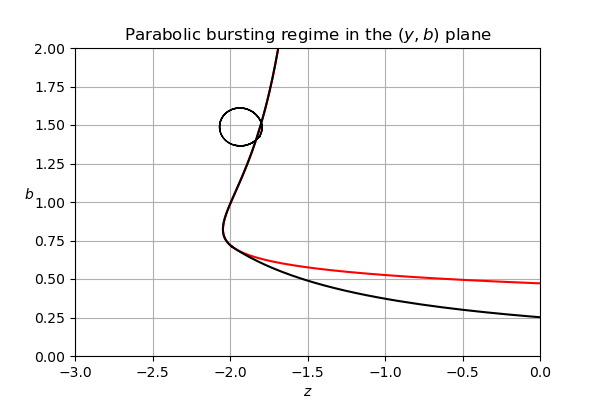

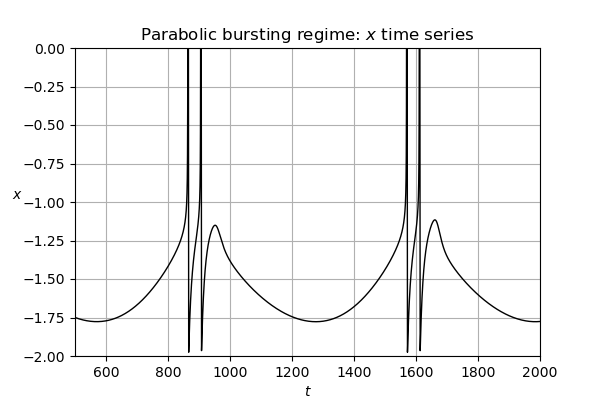

In [14]:
#------
# PLOT
#------
## Figure 2 left panel 
plt.figure(figsize=(6, 4))
# plot bifurcation diagram
plt.plot(bifdiag[  0: 399 ,0],bifdiag[  0: 399   ,1],color='red')
plt.plot(bifdiag[400: 799 ,0],bifdiag[400: 799   ,1],color='red')
plt.plot(bifdiag[800: 904 ,0],bifdiag[800: 904   ,1],color='black')
plt.plot(bifdiag[905:1304 ,0],bifdiag[905:1304   ,1],color='black')
# Plot the solution 
plt.plot(solP.y[2],solP.y[3],'k',linewidth=1)
# Add labels 
plt.xlabel('$z$')
plt.ylabel('$b$',rotation=0)
plt.title('Parabolic bursting regime in the $(y,b)$ plane')
plt.xlim([-3, 0])
plt.ylim([ 0, 2])
plt.grid()
plt.show()
## Figure 2 left panel 
# Plot the solution in projection onto the (z,b) plane 
plt.figure(figsize=(6, 4))
plt.plot(solP.t,solP.y[0],'k',linewidth=1)
# Add labels 
plt.xlabel('$t$')
plt.ylabel('$x$',rotation=0)
plt.title('Parabolic bursting regime: $x$ time series')
plt.xlim([500, 2000])
plt.ylim([ -2, 0])
plt.grid()
plt.show()

### SDE simulation (Euler-Maruyama): square-wave bursting regime

In [17]:
t_max = 4000
nb_time_steps = 2000000
d_t = t_max/nb_time_steps
time_points_sde = np.linspace(0,t_max,nb_time_steps)
sigma_z = 0.75
sigma_b = 0.75
sqrt_d_t = np.sqrt(d_t)
# fix s1, x1, alpha, z0, b0 
s1, alpha, z0, b0 = 0.1, -0.1, -0.7533, 0.57


# --- memory allocation
solution_sde_x = np.zeros(nb_time_steps)
solution_sde_y = np.zeros(nb_time_steps)
solution_sde_z = np.zeros(nb_time_steps)
solution_sde_b = np.zeros(nb_time_steps)

# --- noise simulation
#     [simulated offline to save computation time]
std_dev_z = sqrt_d_t*sigma_z
std_dev_b = sqrt_d_t*sigma_b
np.random.seed(42)
noise_z = np.random.normal(0., std_dev_z, nb_time_steps)
noise_b = np.random.normal(0., std_dev_b, nb_time_steps)

# --- initialization
t, x, y, z, b = 0, ini_cond1_x, ini_cond1_y, ini_cond1_z, ini_cond1_b

solution_sde_x[0] = x
solution_sde_y[0] = y
solution_sde_z[0] = z
solution_sde_b[0] = b

# --- time iterations
for k in range(1,nb_time_steps):
    dot_x = c*(x-x**3/3-y+z+I) 
    dot_y = (x**2+d*x-b*y+a)/c
    dot_z = eps*(-s1*(x-x1)-(b-b0))
    dot_b = eps*(z-z0+alpha*x) 
    x   += d_t*dot_x
    y   += d_t*dot_y
    z   += d_t*dot_z +eps*noise_b[k]
    b   += d_t*dot_b +eps*noise_z[k]
    solution_sde_x[k] = x
    solution_sde_y[k] = y
    solution_sde_z[k] = z
    solution_sde_b[k] = b    

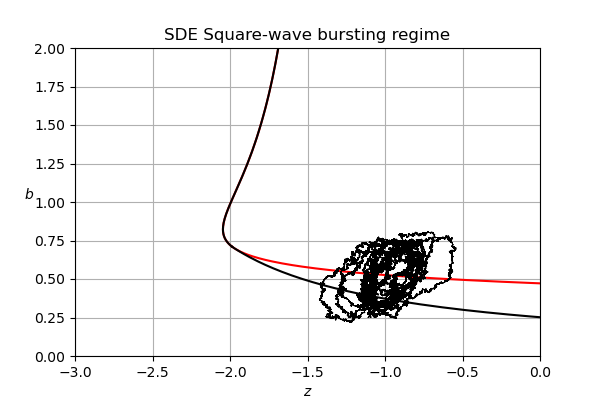

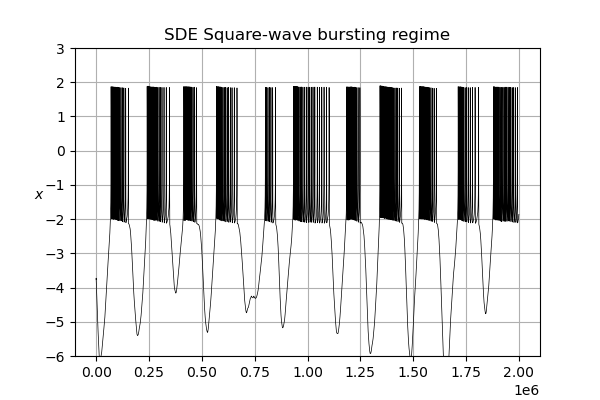

In [18]:
#------
# PLOT
#------
## Figure 3 left panel 
plt.figure(figsize=(6, 4))
# plot bifurcation diagram
plt.plot(bifdiag[  0: 399 ,0],bifdiag[  0: 399   ,1],color='red')
plt.plot(bifdiag[400: 799 ,0],bifdiag[400: 799   ,1],color='red')
plt.plot(bifdiag[800: 904 ,0],bifdiag[800: 904   ,1],color='black')
plt.plot(bifdiag[905:1304 ,0],bifdiag[905:1304   ,1],color='black')
plt.plot(solution_sde_z,solution_sde_b,'k',linewidth=0.5)
# Add labels
plt.xlabel('$z$')
plt.ylabel('$b$',rotation=0)
plt.title('SDE Square-wave bursting regime')
plt.xlim([-3, 0])
plt.ylim([0, 2])
plt.grid()
plt.show()
#
## Figure 3 left panel 
plt.figure(figsize=(6, 4))
plt.plot(solution_sde_x,'k',linewidth=0.5)
# Add labels
plt.ylabel('$x$',rotation=0)
plt.title('SDE Square-wave bursting regime')
plt.ylim([-6, 3])
plt.grid()
plt.show()

### SDE simulation (Euler-Maruyama): parabolic bursting regime

In [21]:
t_max = 2000
nb_time_steps = 1000000
d_t = t_max/nb_time_steps
time_points_sde = np.linspace(0,t_max,nb_time_steps)
sigma_z = 0.75
sigma_b = 0.75
sqrt_d_t = np.sqrt(d_t)
# fix s1, x1, alpha, z0, b0
s1, alpha, z0, b0 = 0.01, -0.1, -1.7737, 1.5

# --- memory allocation
solution_sde_x = np.zeros(nb_time_steps)
solution_sde_y = np.zeros(nb_time_steps)
solution_sde_z = np.zeros(nb_time_steps)
solution_sde_b = np.zeros(nb_time_steps)

# --- noise simulation
#     [simulated offline to save computation time]
std_dev_z = sqrt_d_t*sigma_z
std_dev_b = sqrt_d_t*sigma_b
np.random.seed(42)
noise_z = np.random.normal(0., std_dev_z, nb_time_steps)
noise_b = np.random.normal(0., std_dev_b, nb_time_steps)

# --- initialization
t, x, y, z, b = 0, ini_cond2_x, ini_cond2_y, ini_cond2_z, ini_cond2_b

solution_sde_x[0] = x
solution_sde_y[0] = y
solution_sde_z[0] = z
solution_sde_b[0] = b

# --- time iterations
for k in range(1,nb_time_steps):
    dot_x = c*(x-x**3/3-y+z+I) 
    dot_y = (x**2+d*x-b*y+a)/c
    dot_z = eps*(-s1*(x-x1)-(b-b0))
    dot_b = eps*(z-z0+alpha*x) 
    x   += d_t*dot_x
    y   += d_t*dot_y
    z   += d_t*dot_z +eps*noise_b[k]
    b   += d_t*dot_b +eps*noise_z[k]
    solution_sde_x[k] = x
    solution_sde_y[k] = y
    solution_sde_z[k] = z
    solution_sde_b[k] = b    

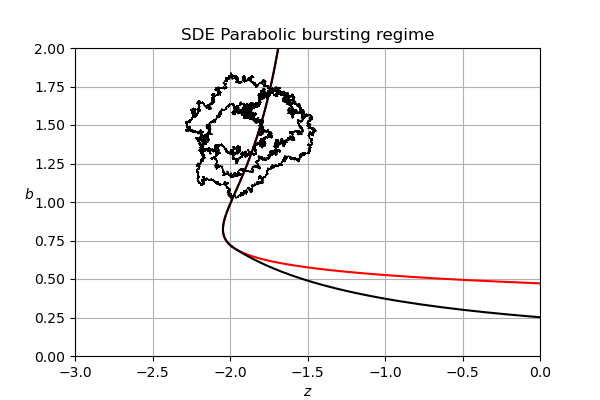

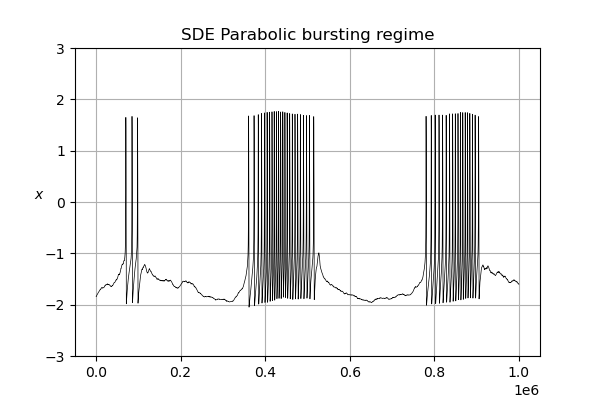

In [22]:
#------
# PLOT
#------
## Figure 4 left panel 
plt.figure(figsize=(6, 4))
# plot bifurcation diagram
plt.plot(bifdiag[  0: 399 ,0],bifdiag[  0: 399   ,1],color='red')
plt.plot(bifdiag[400: 799 ,0],bifdiag[400: 799   ,1],color='red')
plt.plot(bifdiag[800: 904 ,0],bifdiag[800: 904   ,1],color='black')
plt.plot(bifdiag[905:1304 ,0],bifdiag[905:1304   ,1],color='black')
plt.plot(solution_sde_z,solution_sde_b,'k',linewidth=0.5)
# Add labels
plt.xlabel('$z$')
plt.ylabel('$b$',rotation=0)
plt.title('SDE Parabolic bursting regime')
plt.xlim([-3, 0])
plt.ylim([0, 2])
plt.grid()
plt.show()
#
## Figure 4 left panel 
plt.figure(figsize=(6, 4))
plt.plot(solution_sde_x,'k',linewidth=0.5)
# Add labels
plt.ylabel('$x$',rotation=0)
plt.title('SDE Parabolic bursting regime')
plt.ylim([-3, 3])
plt.grid()
plt.show()